# GAIA and STMicroelectronics Tutorial on Tiny Neural Networks using STM32Cube.AI on STM32 micro controllers
# 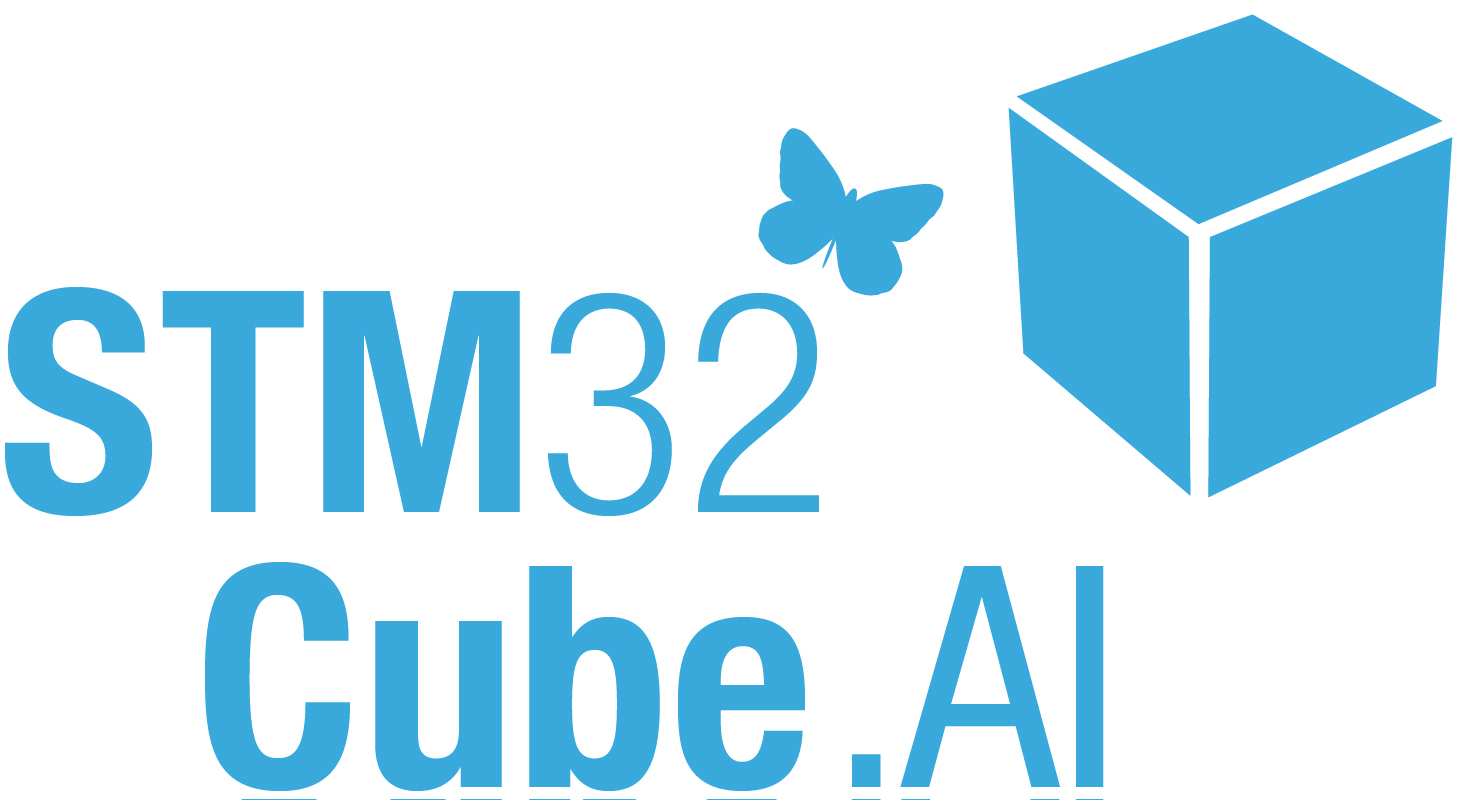

# IoTNext, 02 - 03 Dec 2019, Taj - Yeshwantpur, Bangalore, India
# https://www.iotnext.org/
# 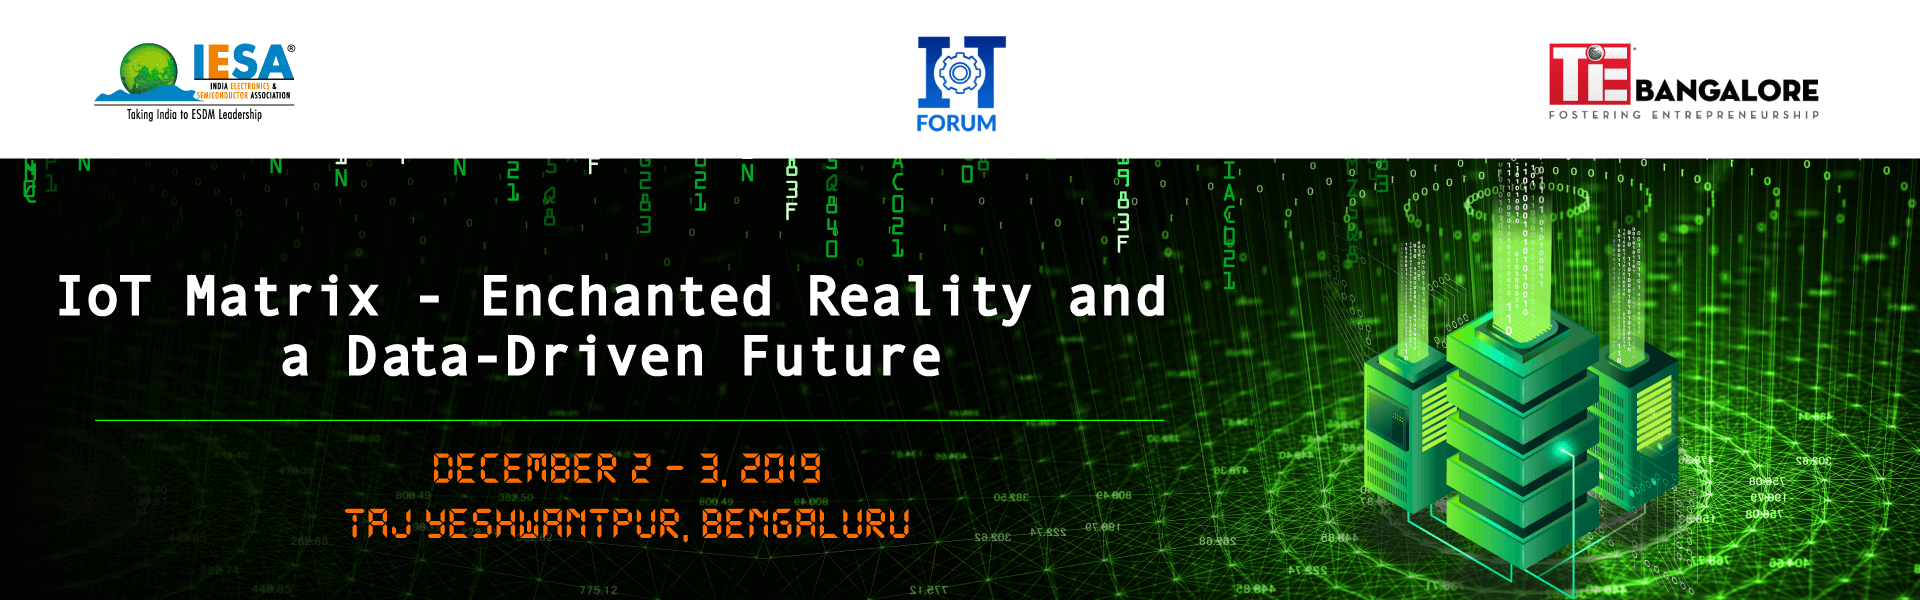

# Teachers:
# Danilo Pau, STMicroelectronics danilo.pau@st.com
# 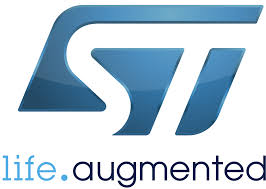
# Prashant Namekar prashant@gaia.in
# 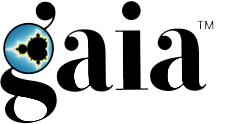

# Saline Bottle Image Classification
## Import Libraries

In [1]:
from __future__ import print_function
from PIL import Image as pil_image
from IPython.display import Image as disp_image
import os
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.models import load_model

Using TensorFlow backend.


## Download GAIA Dataset (optional if not already stored locally)

In [2]:
! wget http://gaia.in:8080//content/workshop_data/resize_sal_data.zip
! unzip resize_sal_data.zip


--2019-12-02 12:11:00--  http://gaia.in:8080//content/workshop_data/resize_sal_data.zip
Resolving gaia.in (gaia.in)... 52.172.209.242, fd00:0:b:33::34ac:d1f2
Connecting to gaia.in (gaia.in)|52.172.209.242|:8080... connected.
HTTP request sent, awaiting response... 200 
Length: 1099462 (1.0M) [application/zip]
Saving to: ‘resize_sal_data.zip’

resize_sal_data.zip 100%[===================>]   1.05M   649KB/s    in 1.7s    

2019-12-02 12:11:03 (649 KB/s) - ‘resize_sal_data.zip’ saved [1099462/1099462]

Archive:  resize_sal_data.zip
   creating: resize_sal_data/
   creating: resize_sal_data/sal_data_100/
  inflating: resize_sal_data/sal_data_100/IMG_20191114_151449612.jpg  
  inflating: resize_sal_data/sal_data_100/IMG_20191114_150753033.jpg  
  inflating: resize_sal_data/sal_data_100/IMG_20191115_155409942.jpg  
  inflating: resize_sal_data/sal_data_100/IMG_20191114_150512673.jpg  
  inflating: resize_sal_data/sal_data_100/IMG_20191115_154631121.jpg  
  inflating: resize_sal_data/sal_dat

## Set Global Variables

In [3]:
PATH="resize_sal_data_temp_del"
RESIZE=False
batch_size = 32
num_classes = 3
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')




# Data Preparation

## Define and set Data Labels

In [4]:
# mention the classes you want to consider
folders=['sal_data_100','sal_data_50','sal_data_80']
list_input = ['sal_data_100','sal_data_50','sal_data_80']

def create_classes(list_input):
    classes_dict = {}
    count_dict = {}
    for i in range(len(folders)):
        key_word= folders[i]
        if key_word in list_input:
            #get the index of the list:
            index = list_input.index(key_word)
            classes_dict[key_word] = index
        else:
            count_dict[key_word] = 0
            classes_dict[key_word] = len(list_input)
    return classes_dict, count_dict
classes_dict, count_dict = create_classes(list_input)
print(classes_dict)



{'sal_data_100': 0, 'sal_data_50': 1, 'sal_data_80': 2}


## Combining all labels and data in a common file

In [5]:
#FORMING A FILE LABEL/DATA

#save_dir = os.path.join(os.getcwd(), 'saved_models')

img_dir=os.listdir("resize_sal_data_temp_del")
data_file = open("saline_data3.txt",'w')
for dir in img_dir:
    img_path=PATH + "/" + dir
    for img in os.listdir(img_path):
        print(dir+'/'+img)
        data_file.write(dir+'/'+img+"\n")

data_file.close() 

sal_data_100/IMG_20191114_144434632.jpg
sal_data_100/IMG_20191114_150423766.jpg
sal_data_100/IMG_20191115_154732818.jpg
sal_data_100/IMG_20191114_125232135.jpg
sal_data_100/IMG_20191115_155440082.jpg
sal_data_100/IMG_20191115_154658057.jpg
sal_data_100/IMG_20191114_150736772.jpg
sal_data_100/IMG_20191114_151040285.jpg
sal_data_100/IMG_20191114_124325870.jpg
sal_data_100/IMG_20191115_154730038.jpg
sal_data_100/IMG_20191114_151231278.jpg
sal_data_100/IMG_20191114_144306572.jpg
sal_data_100/IMG_20191114_133018777.jpg
sal_data_100/IMG_20191114_151034398.jpg
sal_data_100/IMG_20191115_155319230.jpg
sal_data_100/IMG_20191114_150927662.jpg
sal_data_100/IMG_20191115_155330394.jpg
sal_data_100/IMG_20191115_155534101.jpg
sal_data_100/IMG_20191114_150547617.jpg
sal_data_100/IMG_20191115_155306234.jpg
sal_data_100/IMG_20191114_132303653.jpg
sal_data_100/IMG_20191115_155431570.jpg
sal_data_100/IMG_20191114_132621634.jpg
sal_data_100/IMG_20191115_154620492.jpg
sal_data_100/IMG_20191114_133841800.jpg


# Let's Train a Convolutional Neural Network model

In [6]:
f = open("saline_data3.txt", "r")
lines = f.readlines()
#print(lines)
X = []
Y = []
size=(32,32)

for line in lines:
  try:
    line = line.strip('\n')
    label, filename = line.split("/")
    if label in folders:
       filename = PATH + "/" + label + "/" + filename
       img=pil_image.open(filename)
       
       if RESIZE:
           img_reshape=img.resize(size)
           #print(img_reshape.format, img_reshape.size, img_reshape.mode)
           img_reshape.save("temp.jpg")
           img=img_reshape
       np_im = np.array(img)
       class_number=classes_dict[label] 
       X.append(np_im)
       Y.append(class_number)
       #j.save("C:/Users/User/Desktop/mesh_trans",".bmp")
       #disp_image(filename="/home/gaia/prashant_gaia/temp.jpg") 

  except Exception as e:
           print(str(e))
    
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)


(1155, 32, 32, 3)
(1155,)


In [7]:
model_name = 'saline.h5'
epochs = 50

# For data splitting use the sckit lib
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# check model structure and the number of parameters
model.summary()

# Let's train the model 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)      

## Test the just trained Neural Network Model

In [8]:
import tensorflow.keras
from PIL import Image
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('saved_models/saline.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 32, 32, 3), dtype=np.float32)

# Replace this with the path to your image
#image = Image.open('resize_sal_data_temp_del/sal_data_50/IMG_20191115_163600252.jpg')
image = Image.open('resize_sal_data_temp_del/sal_data_80/IMG_20191115_145157148.jpg')
#image = Image.open('resize_sal_data_temp_del/sal_data_100/IMG_20191114_150506284.jpg')

# Make sure to resize all images to 32, 32 otherwise they won't fit in the array
image.resize((32, 32))
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = image_array / 255.0

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
#print(classes_dict)
#print(np.argmax(prediction))
print("The predicted class is:")
print(list(classes_dict.keys())[list(classes_dict.values()).index(np.argmax(prediction))]) 

The predicted class is:
sal_data_80


# Step 1) Check the model size of the above trained model available in saved_models/saline.h5 
# Step 2) Is saline.h5 footprint too big ? Does it fit into Nucleo-STM32H743ZI board ?
# Step 3) Find out using X-CUBE-AI and then ....

# .... Lets simplify and train a hopefully Tiny Neural Network model 

In [9]:


save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'saline_topology.h5'



# For data splitting use the sckit lib
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# check model structure and the number of parameters
model.summary()

# Let's train the model 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
activation_8 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)         

# Edit Your Tiny Neural Network here

## Attempt 1

In [10]:
epochs = 250

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'my_saline_topology_1.h5'



# For data splitting use the sckit lib
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', strides=(2,2), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# check model structure and the number of parameters
model.summary()

# Let's train the model 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
activation_14 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 8)          

Epoch 40/250
773/773 [==============================] - 0s 157us/step - loss: 0.5310 - accuracy: 0.7956 - val_loss: 0.5468 - val_accuracy: 0.7984
Epoch 41/250
773/773 [==============================] - 0s 160us/step - loss: 0.5555 - accuracy: 0.7762 - val_loss: 0.5507 - val_accuracy: 0.7670
Epoch 42/250
773/773 [==============================] - 0s 186us/step - loss: 0.5294 - accuracy: 0.7801 - val_loss: 0.5477 - val_accuracy: 0.7827
Epoch 43/250
773/773 [==============================] - 0s 428us/step - loss: 0.5735 - accuracy: 0.7658 - val_loss: 0.5550 - val_accuracy: 0.8037
Epoch 44/250
773/773 [==============================] - 0s 210us/step - loss: 0.5433 - accuracy: 0.7762 - val_loss: 0.5395 - val_accuracy: 0.8010
Epoch 45/250
773/773 [==============================] - 0s 182us/step - loss: 0.5193 - accuracy: 0.7801 - val_loss: 0.5632 - val_accuracy: 0.8063
Epoch 46/250
773/773 [==============================] - 0s 173us/step - loss: 0.5626 - accuracy: 0.7646 - val_loss: 0.5568 -

Epoch 152/250
773/773 [==============================] - 0s 162us/step - loss: 0.1674 - accuracy: 0.9366 - val_loss: 0.3576 - val_accuracy: 0.8927
Epoch 153/250
773/773 [==============================] - 0s 156us/step - loss: 0.1496 - accuracy: 0.9547 - val_loss: 0.3758 - val_accuracy: 0.8796
Epoch 154/250
773/773 [==============================] - 0s 161us/step - loss: 0.1623 - accuracy: 0.9470 - val_loss: 0.3499 - val_accuracy: 0.8927
Epoch 155/250
773/773 [==============================] - 0s 157us/step - loss: 0.1624 - accuracy: 0.9392 - val_loss: 0.3549 - val_accuracy: 0.8901
Epoch 156/250
773/773 [==============================] - 0s 161us/step - loss: 0.1285 - accuracy: 0.9586 - val_loss: 0.4456 - val_accuracy: 0.8770
Epoch 157/250
773/773 [==============================] - 0s 160us/step - loss: 0.1483 - accuracy: 0.9495 - val_loss: 0.3554 - val_accuracy: 0.8796
Epoch 158/250
773/773 [==============================] - 0s 158us/step - loss: 0.1451 - accuracy: 0.9366 - val_loss: 0

Epoch 208/250
773/773 [==============================] - 0s 175us/step - loss: 0.1251 - accuracy: 0.9508 - val_loss: 0.3521 - val_accuracy: 0.8874
Epoch 209/250
773/773 [==============================] - 0s 159us/step - loss: 0.1291 - accuracy: 0.9599 - val_loss: 0.3924 - val_accuracy: 0.8717
Epoch 210/250
773/773 [==============================] - 0s 159us/step - loss: 0.1278 - accuracy: 0.9470 - val_loss: 0.3949 - val_accuracy: 0.8691
Epoch 211/250
773/773 [==============================] - 0s 160us/step - loss: 0.1228 - accuracy: 0.9470 - val_loss: 0.4043 - val_accuracy: 0.8717
Epoch 212/250
773/773 [==============================] - 0s 160us/step - loss: 0.1440 - accuracy: 0.9521 - val_loss: 0.4309 - val_accuracy: 0.8639
Epoch 213/250
773/773 [==============================] - 0s 160us/step - loss: 0.1227 - accuracy: 0.9521 - val_loss: 0.4091 - val_accuracy: 0.8822
Epoch 214/250
773/773 [==============================] - 0s 176us/step - loss: 0.1270 - accuracy: 0.9547 - val_loss: 0

## Attempt 2

In [11]:
epochs = 260

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'my_saline_topology_2.h5'



# For data splitting use the sckit lib
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', strides=(2,2), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(12, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# check model structure and the number of parameters
model.summary()

# Let's train the model 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 12)          3468      
_________________________________________________________________
activation_19 (Activation)   (None, 6, 6, 12)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 8)          

Epoch 40/260
773/773 [==============================] - 0s 155us/step - loss: 0.6046 - accuracy: 0.7620 - val_loss: 0.6028 - val_accuracy: 0.7749
Epoch 41/260
773/773 [==============================] - 0s 156us/step - loss: 0.5753 - accuracy: 0.7581 - val_loss: 0.6248 - val_accuracy: 0.7461
Epoch 42/260
773/773 [==============================] - 0s 154us/step - loss: 0.6037 - accuracy: 0.7555 - val_loss: 0.5992 - val_accuracy: 0.7670
Epoch 43/260
773/773 [==============================] - 0s 159us/step - loss: 0.5561 - accuracy: 0.7788 - val_loss: 0.5954 - val_accuracy: 0.7696
Epoch 44/260
773/773 [==============================] - 0s 245us/step - loss: 0.5515 - accuracy: 0.7581 - val_loss: 0.5890 - val_accuracy: 0.7618
Epoch 45/260
773/773 [==============================] - 0s 288us/step - loss: 0.5196 - accuracy: 0.8021 - val_loss: 0.5911 - val_accuracy: 0.7775
Epoch 46/260
773/773 [==============================] - 0s 180us/step - loss: 0.5764 - accuracy: 0.7684 - val_loss: 0.6012 -

Epoch 152/260
773/773 [==============================] - 0s 160us/step - loss: 0.2227 - accuracy: 0.9211 - val_loss: 0.4303 - val_accuracy: 0.8455
Epoch 153/260
773/773 [==============================] - 0s 160us/step - loss: 0.2139 - accuracy: 0.9159 - val_loss: 0.4141 - val_accuracy: 0.8403
Epoch 154/260
773/773 [==============================] - 0s 162us/step - loss: 0.2121 - accuracy: 0.9263 - val_loss: 0.4124 - val_accuracy: 0.8429
Epoch 155/260
773/773 [==============================] - 0s 170us/step - loss: 0.2020 - accuracy: 0.9301 - val_loss: 0.3936 - val_accuracy: 0.8560
Epoch 156/260
773/773 [==============================] - 0s 161us/step - loss: 0.2021 - accuracy: 0.9237 - val_loss: 0.4078 - val_accuracy: 0.8613
Epoch 157/260
773/773 [==============================] - 0s 159us/step - loss: 0.2227 - accuracy: 0.9133 - val_loss: 0.4243 - val_accuracy: 0.8482
Epoch 158/260
773/773 [==============================] - 0s 162us/step - loss: 0.2178 - accuracy: 0.9185 - val_loss: 0

Epoch 208/260
773/773 [==============================] - 0s 176us/step - loss: 0.1326 - accuracy: 0.9573 - val_loss: 0.4619 - val_accuracy: 0.8613
Epoch 209/260
773/773 [==============================] - 0s 198us/step - loss: 0.1586 - accuracy: 0.9418 - val_loss: 0.4174 - val_accuracy: 0.8403
Epoch 210/260
773/773 [==============================] - 0s 184us/step - loss: 0.1446 - accuracy: 0.9521 - val_loss: 0.4143 - val_accuracy: 0.8482
Epoch 211/260
773/773 [==============================] - 0s 174us/step - loss: 0.1279 - accuracy: 0.9560 - val_loss: 0.4611 - val_accuracy: 0.8429
Epoch 212/260
773/773 [==============================] - 0s 172us/step - loss: 0.1404 - accuracy: 0.9457 - val_loss: 0.5011 - val_accuracy: 0.8168
Epoch 213/260
773/773 [==============================] - 0s 225us/step - loss: 0.1460 - accuracy: 0.9483 - val_loss: 0.4451 - val_accuracy: 0.8455
Epoch 214/260
773/773 [==============================] - 0s 157us/step - loss: 0.1305 - accuracy: 0.9534 - val_loss: 0

# Let's test the Tiny Neural Network Model

## Use a database image
### Note: you can type different image path in Image.open function

In [16]:
import tensorflow.keras
from PIL import Image
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('saved_models/my_saline_topology_2.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 32, 32, 3), dtype=np.float32)

# Replace this with the path to your image
#image = Image.open('resize_sal_data_temp_del/sal_data_50/IMG_20191115_163600252.jpg')
#image = Image.open('resize_sal_data_temp_del/sal_data_80/IMG_20191115_145157148.jpg')
image = Image.open('resize_sal_data_temp_del/sal_data_100/IMG_20191114_150506284.jpg')

# Make sure to resize all images to 32, 32 otherwise they won't fit in the array
image.resize((32, 32))
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = image_array / 255.0

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
#print(classes_dict)
#print(np.argmax(prediction))
print("The predicted class is:")
print(list(classes_dict.keys())[list(classes_dict.values()).index(np.argmax(prediction))]) 

The predicted class is:
sal_data_100


## Acquire live image using webcam

In [13]:
from __future__ import print_function
from PIL import Image as pil_image
from IPython.display import Image as disp_image
import os
import numpy as np

In [17]:
!pip install opencv-python

  Using cached https://files.pythonhosted.org/packages/d8/38/60de02a4c9013b14478a3f681a62e003c7489d207160a4d7df8705a682e7/opencv_python-4.1.2.30-cp37-cp37m-manylinux1_x86_64.whl


In [18]:
from cv2 import *
# initialize the camera
cam = VideoCapture(0)   # 0 -> index of camera
s, img = cam.read()
if s:    # frame captured without any errors
    imshow("cam-test",img)
    waitKey(0)
    destroyWindow("cam-test")
    imwrite("/iotnext19_st_gaia/save_picture/liveimage.jpg",img) #save image
    cam.release()

## Resize live image

In [ ]:
#Image.open
img=pil_image.open("/iotnext19_st_gaia/save_picture/liveimage.jpg")
size=(32,32)
img_reshape=img.resize(size)
print(img_reshape.format, img_reshape.size, img_reshape.mode)
img_reshape.save("/iotnext19_st_gaia/save_picture/liveresized.jpg")
#j.save("C:/Users/User/Desktop/mesh_trans",".bmp")
np_im = np.array(img_reshape)
print (np_im.shape)
disp_image(filename="/iotnext19_st_gaia/save_picture/liveresized.jpg")


## Retest the Tiny Neural Network model with a live image

In [25]:
import tensorflow.keras
from PIL import Image
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('saved_models/my_saline_topology_2.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 32, 32, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('/iotnext19_st_gaia/save_picture/liveresized.jpg')

# Make sure to resize all images to 32, 32 otherwise they won't fit in the array
image.resize((32, 32))
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = image_array / 255.0
 
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
#print(classes_dict)
#print(np.argmax(prediction))
print("The predicted class is:")
print(list(classes_dict.keys())[list(classes_dict.values()).index(np.argmax(prediction))]) 

The predicted class is:
sal_data_100
